In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("./Data/automobileEDA.csv")
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [9]:
# Model1: Linear Regression

X = df[["highway-mpg"]]
Y = df["price"]

from sklearn.linear_model import LinearRegression
lm1 = LinearRegression()
lm1.fit(X,Y)
Yhat = lm1.predict(X)

print(lm1.intercept_) # type is np.ndarray
print(lm1.coef_)      # type is np.ndarray
print(f"Final model: Price = {lm1.intercept_}, + {lm1.coef_} x highway-mpg")

38423.3058581574
[-821.73337832]
Final model: Price = 38423.3058581574, + [-821.73337832] x highway-mpg


<AxesSubplot: xlabel='highway-mpg', ylabel='price'>

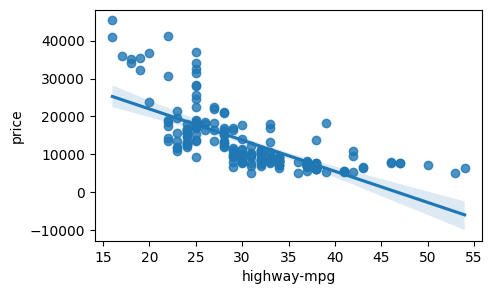

In [10]:
plt.figure(figsize = (5,3))
sns.regplot(x = X, y=Y)

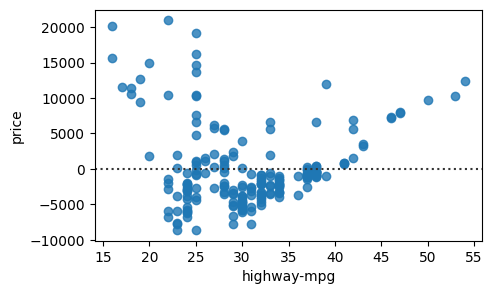

In [11]:
# Residual Plot
# A good way to visualize
# The difference between the observed value (y) and the predicted value (Yhat) - residuals
# It will regress y on x and then draw a scatterplot of the residuals.

plt.figure(figsize = (5,3))
sns.residplot(x="highway-mpg", y="price", data = df)
# or
# sns.residplot(x=df["highway-mpg"], y=df["price"])
plt.show()

# Structure in the residual plot can reveal a violation of linear regression assumptions:
# the residuals are not randomly spread around the x-axis, 
# leading us to believe that maybe a non-linear model is more appropriate for this data.

In [15]:
# Model2: Multiple Linear Regression

X2 = df[["horsepower", "curb-weight", "engine-size", "highway-mpg"]]
Y = df["price"]

lm2 = LinearRegression()
lm2.fit(X2, Y)
Yhat2 = lm2.predict(X2)

print(lm2.intercept_) # type is np.ndarray
print(lm2.coef_)      # type is np.ndarray
print(f"Final model: Price = {lm2.intercept_}, + {lm2.coef_[0]} x horsepower, + {lm2.coef_[1]} x curb-weight, + {lm2.coef_[2]} x engine-size, + {lm2.coef_[3]} x highway-mpg")

-15806.62462632922
[53.49574423  4.70770099 81.53026382 36.05748882]
Final model: Price = -15806.62462632922, + 53.49574422604914 x horsepower, + 4.707700994613939 x curb-weight, + 81.53026382122758 x engine-size, + 36.05748881648596 x highway-mpg


/var/folders/t5/qzhs0cqd7j74pxklwgqj8d2h0000gn/T/ipykernel_3215/935889296.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(Y, hist=False, color = "r", label = "Actual Value")
/var/folders/t5/qzhs0cqd7j74pxklwgqj8d2h0000gn/T/ipykernel_3215/935889296.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457a

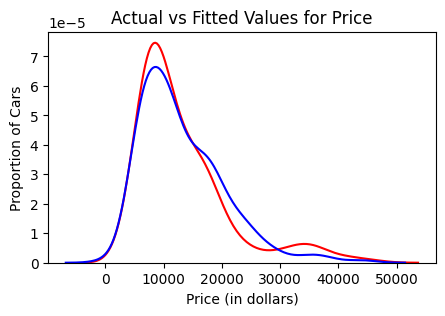

In [17]:
# distplot for multiple Linear Regression

plt.figure(figsize = (5,3))
ax1 = sns.distplot(Y, hist=False, color = "r", label = "Actual Value")
ax2 = sns.distplot(Yhat2, hist=False, color = "b", label = "Fitted Values", ax = ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

# We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. 
# However, there is definitely some room for improvement.

In [18]:
# Model3: Polynomial Regression

X3 = df["highway-mpg"]
Y = df["price"]

# Here we use a polynomial of the 3rd order (cubic)
f3 = np.polyfit(X3, Y, 3)
p3 = np.poly1d(f3) #This variable is passes as model
print(p3) # It has to be displayed by using print to show neat formula order, otherwise just returns the array of parameters

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


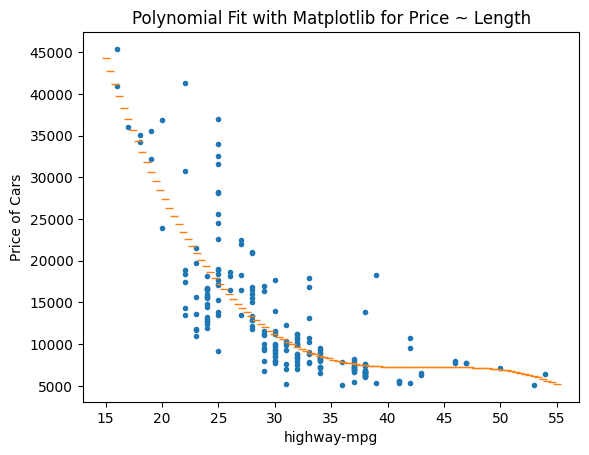

In [19]:
# We will use the following function to plot the data:

def PlotPolly(model, x, y, Name):
    x_new = np.linspace(15,55,100) # min of highway-mpg is 16 and max of it is 56
    y_new = model(x_new)
    
    plt.plot(x, y, '.', x_new, y_new, '_')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    # ax = plt.gca() # Get the current Axes.
    # ax.set_facecolor((0.898, 0.898, 0.898)) # makes the background color grey
    #fig = plt.gcf() # Get the current figure
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

PlotPolly(p3, X3, Y, "highway-mpg")

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


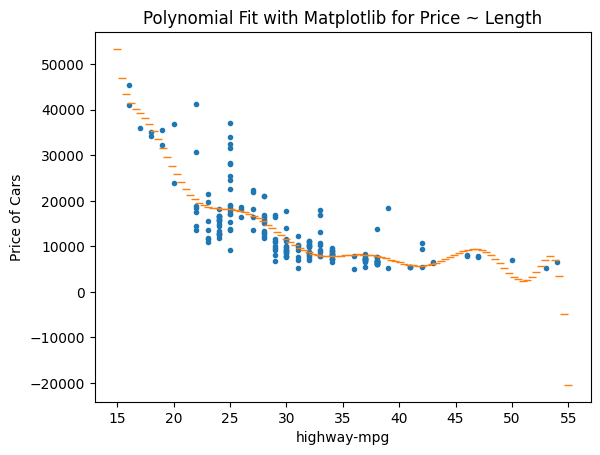

In [20]:
# 11 order polynomial
f11 = np.polyfit(X3, Y,11)
p11 = np.poly1d(f11)
print(p11)

PlotPolly(p11, X3, Y, "highway-mpg")

In [21]:
# We can perform a polynomial transform on multiple features. First, we import the module:
# Model4: polynomial with multiple features

X2 = df[["horsepower", "curb-weight", "engine-size", "highway-mpg"]]
Y = df["price"]

from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree = 2)
X_pr = pr.fit_transform(X2)

In [22]:
X2.shape

(201, 4)

In [23]:
X_pr.shape

(201, 15)

In [72]:
# In the original data, there are 201 samples and 4 features.
# After the transformation, there are 201 samples and 15 features.

In [24]:
# pipeline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Input = [('scale',StandardScaler()), 
         ('polynomial', PolynomialFeatures(include_bias=False)), 
         ('model',LinearRegression())]

pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [25]:
# we convert the data type X2 to type float to avoid conversion warnings that may appear 
# as a result of StandardScaler taking float inputs.
X2 = X2.astype(float)
pipe.fit(X2,Y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [26]:
# Similarly, we can normalize the data, perform a transform and produce a prediction simultaneously.
ypipe = pipe.predict(X2)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [27]:
# Create a pipeline that standardizes the data, 
# then produce a prediction using a linear regression model using the features X2 and target y.
Input = [("scale", StandardScaler()),
         ("model",LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(X2,Y)
ypipe = pipe.predict(X2)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

In [28]:
# Measures for In-Sample Evaluation

# R^2 / R-squared
# Mean Squared Error (MSE)

# model 1: Simple Linear Regression

# Let's calculate the R^2:
print("Model1 R-square is: ", lm1.score(X, Y))

#Let's calculate the MSE:
Yhat = lm1.predict(X)

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y,Yhat)
print('model1 mean square error of price and predicted value is: ', mse)

Model1 R-square is:  0.4965911884339176
model1 mean square error of price and predicted value is:  31635042.944639888


In [30]:
# model 2: Multiple Linear Regression

print('Model2 R-square is: ', lm2.score(X2, Y))

Yhat = lm2.predict(X2)
mse = mean_squared_error(Y, Yhat)
print('Model2 mean square error of price and predicted value is: ', mse)

Model2 R-square is:  0.8093562806577457
Model2 mean square error of price and predicted value is:  11980366.87072649


In [32]:
# Model 3: Polynomial Fit

from sklearn.metrics import r2_score

r_squared = r2_score(Y, p3(X3))
print('Model3 R-square is: ', r_squared)

Yhat = p3(X3)
mse = mean_squared_error(Y, Yhat)
print('Model3 mean square error of price and predicted value using multifit is: ', mse)

Model3 R-square is:  0.674194666390652
Model3 mean square error of price and predicted value using multifit is:  20474146.426361218


In [117]:
# Decision Making: Determining a Good Model Fit

# the model with the higher R-squared value is a better fit for the data.
# the model with the smallest MSE value is a better fit for the data.

# Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
# R-squared: 0.49659118843391759
# MSE: 3.16 x10^7

# Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
# R-squared: 0.80896354913783497
# MSE: 1.2 x10^7

# Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
# R-squared: 0.6741946663906514
# MSE: 2.05 x 10^7

# Comparing these three models(2 by 2), we conclude that the MLR model is the best model to be able to predict price 
# from our dataset. This result makes sense since we have 27 variables in total 
# and we know that more than one of those variables are potential predictors of the final car price.


LinearRegression()